# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

# 1. 数据导入

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
data = pd.read_csv("house_price.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# 2. 数据清洗与描述性统计

## 2.1 数据清洗

#### 处理缺失数据

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


可以发现原数据没有缺失值，由于数据结构较为整齐，因此也无需进行过多地清洗

#### 处理重复数据

#### 处理不一致数据

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data["mainroad"].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [6]:
data["guestroom"].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [7]:
data["basement"].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [8]:
data["hotwaterheating"].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [9]:
data["airconditioning"].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [10]:
data["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [11]:
data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

没有数据不一致的情况

In [12]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# 3. 可视化分析

In [13]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
# 设置色盘
sns.set_palette("pastel")

## 3.1 分布情况

### 卧室数量分布

In [15]:
# 设置figure的大小
plt.rcParams["figure.figsize"] = [7, 3.5]

#启用自动调整布局功能，避免画面出现遮挡
plt.rcParams["figure.autolayout"] = True

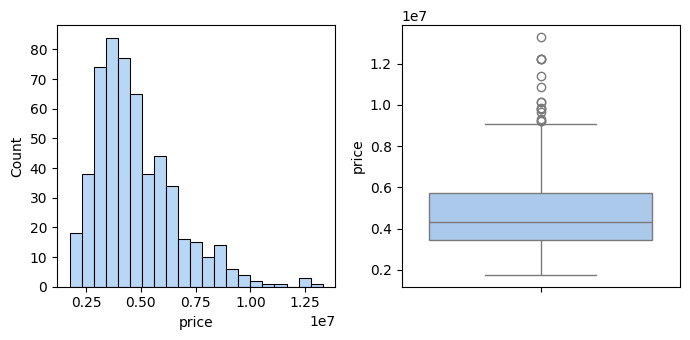

In [16]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "price", ax = axes[0])
sns.boxplot(data, y = "price", ax = axes[1])
plt.show()

房价的分布呈右偏分布

### 面积分布

分析分布情况时，可以使用箱型图

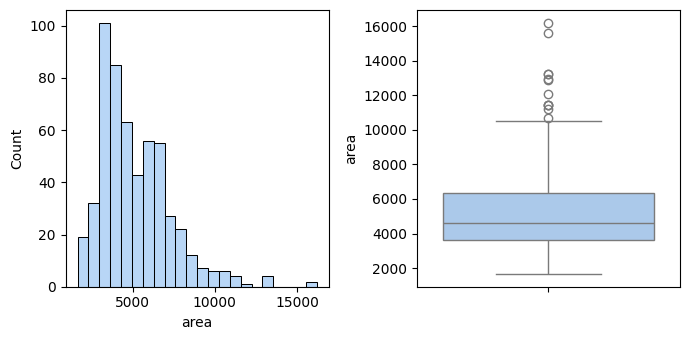

In [17]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "area", ax = axes[0])
sns.boxplot(data, y = "area", ax = axes[1])
plt.show()

可以发现样本中房屋面积主要呈右偏分布，大多房屋的面积都集中在10000一下，少部分房屋的面积超过10000，最大可达16000

## 3.2 与房价的关系

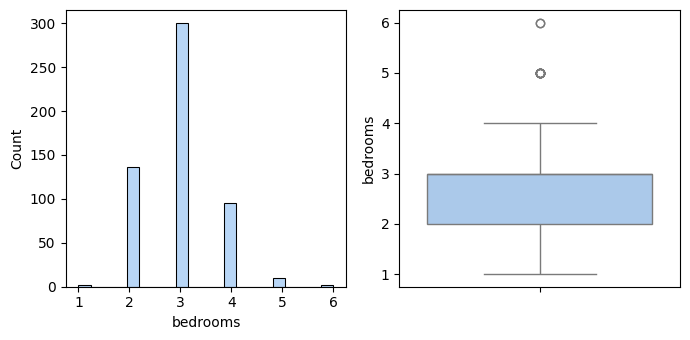

In [18]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "bedrooms", ax = axes[0])
sns.boxplot(data, y = "bedrooms", ax = axes[1])
plt.show()

卧室数量的分布大多集中在2-4个

### 面积与房价的关系

两离散变量之间的关系，可以使用散点图描述

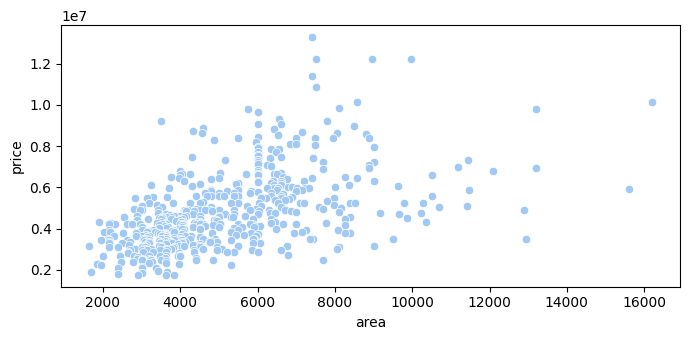

In [19]:
sns.scatterplot(data, x = "area", y = "price")
plt.show()

可以大致看出，二者存在正相关的关系

### 卧室数量与房价的关系

由于卧室数量在确定的范围内，可以理解为分类型变量，使用柱状图描述

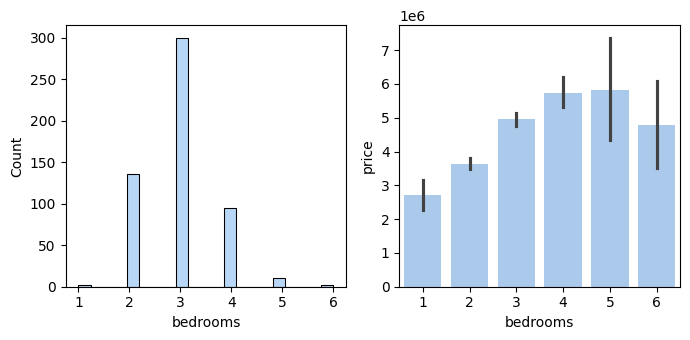

In [20]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "bedrooms", ax = axes[0])
sns.barplot(data, x = "bedrooms", y = "price", ax = axes[1])
plt.show()

大体来说，卧室越多的房子房价也越高

### 厕所数量与房价的关系

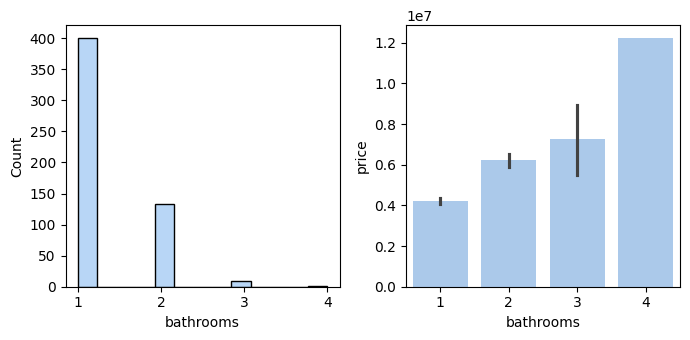

In [21]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "bathrooms", ax = axes[0])
sns.barplot(data, x = "bathrooms", y = "price", ax = axes[1])
plt.show()

厕所数量与房价成正相关

### 楼层数与房价的关系

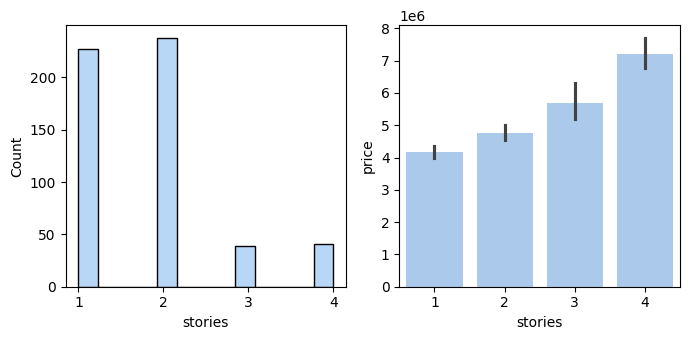

In [22]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "stories", ax = axes[0])
sns.barplot(data, x = "stories", y = "price", ax = axes[1])
plt.show()

### 车库数与房价的关系

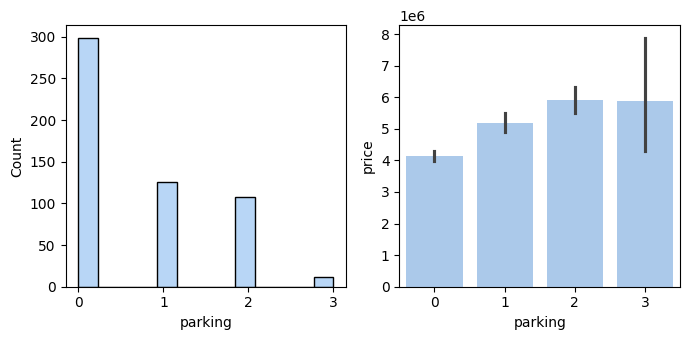

In [23]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "parking", ax = axes[0])
sns.barplot(data, x = "parking", y = "price", ax = axes[1])
plt.show()

### 是否在主路与房价的关系

### 楼层数与房价的关系

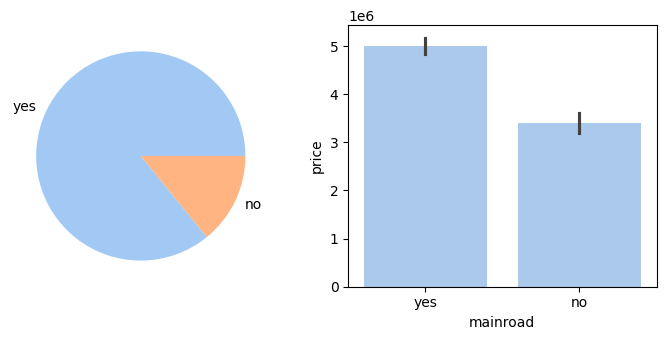

In [24]:
fig, axes = plt.subplots(1, 2)

# 先获得该列中的计数和标签
mainroad_count = data["mainroad"].value_counts()
mainroad_label = mainroad_count.index

# 将饼图和柱状图加入子图中
axes[0].pie(mainroad_count, labels = mainroad_label)
sns.barplot(data, x = "mainroad", y = "price", ax = axes[1])

plt.show()

### 是否有客人房与房价的关系

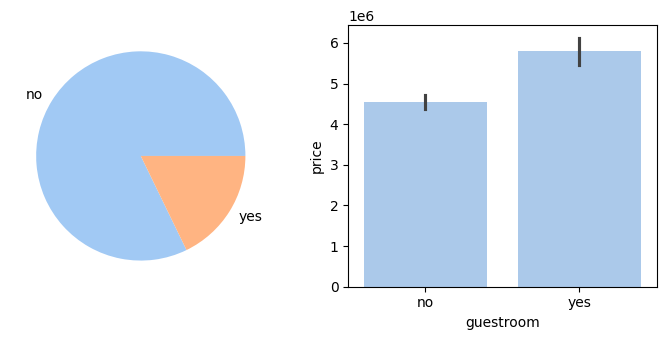

In [25]:
fig, axes = plt.subplots(1, 2)

# 先获得该列中的计数和标签
guestroom_count = data["guestroom"].value_counts()
guestroom_label = guestroom_count.index

# 将饼图和柱状图加入子图中
axes[0].pie(guestroom_count, labels = guestroom_label)
sns.barplot(data, x = "guestroom", y = "price", ax = axes[1])

plt.show()

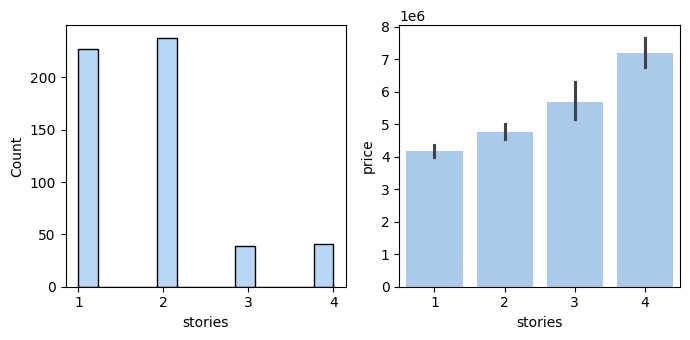

In [26]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data, x = "stories", ax = axes[0])
sns.barplot(data, x = "stories", y = "price", ax = axes[1])
plt.show()

### 是否有地下室与房价的关系

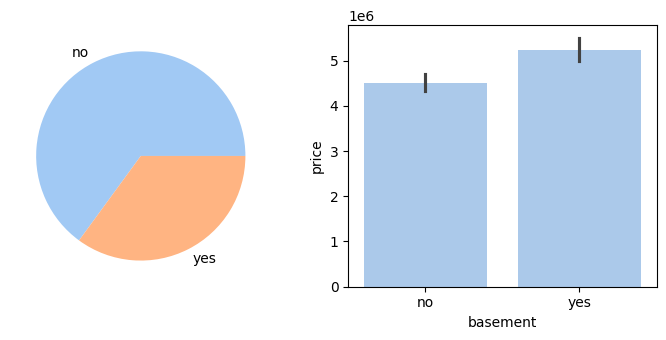

In [27]:
fig, axes = plt.subplots(1, 2)

# 先获得该列中的计数和标签
basement_count = data["basement"].value_counts()
basement_label = basement_count.index

# 将饼图和柱状图加入子图中
axes[0].pie(basement_count, labels = basement_label)
sns.barplot(data, x = "basement", y = "price", ax = axes[1])

plt.show()

### 是否有热水器与房价的关系

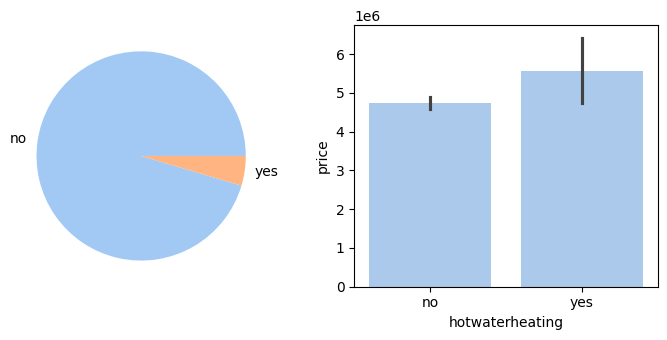

In [28]:
fig, axes = plt.subplots(1, 2)

# 先获得该列中的计数和标签
hotwaterheating_count = data["hotwaterheating"].value_counts()
hotwaterheating_label = hotwaterheating_count.index

# 将饼图和柱状图加入子图中
axes[0].pie(hotwaterheating_count, labels = hotwaterheating_label)
sns.barplot(data, x = "hotwaterheating", y = "price", ax = axes[1])

plt.show()

### 是否有空调与房价的关系

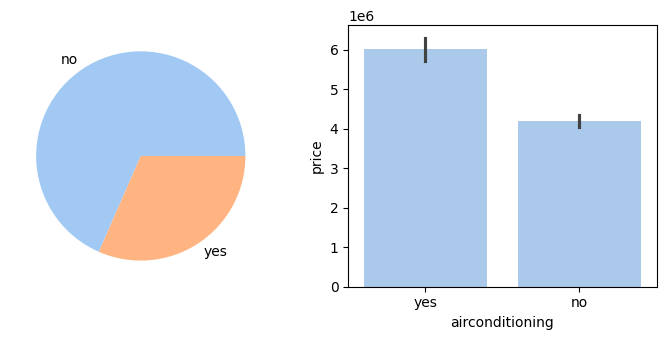

In [29]:
fig, axes = plt.subplots(1, 2)

# 先获得该列中的计数和标签
airconditioning_count = data["airconditioning"].value_counts()
airconditioning_label = airconditioning_count.index

# 将饼图和柱状图加入子图中
axes[0].pie(airconditioning_count, labels = airconditioning_label)
sns.barplot(data, x = "airconditioning", y = "price", ax = axes[1])

plt.show()

### 是否位于城市首选社区与房价的关系

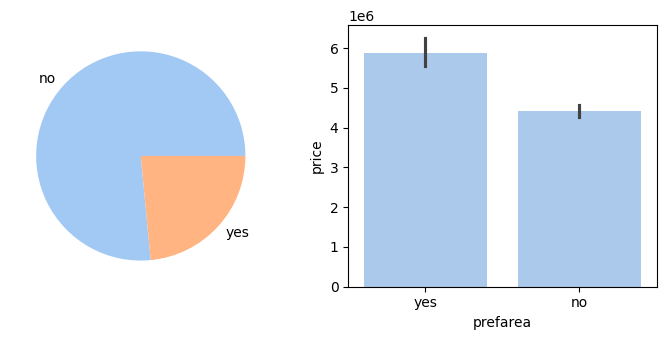

In [30]:
fig, axes = plt.subplots(1, 2)

# 先获得该列中的计数和标签
prefarea_count = data["prefarea"].value_counts()
prefarea_label = prefarea_count.index

# 将饼图和柱状图加入子图中
axes[0].pie(prefarea_count, labels = prefarea_label)
sns.barplot(data, x = "prefarea", y = "price", ax = axes[1])

plt.show()

### 装修程度与房价的关系

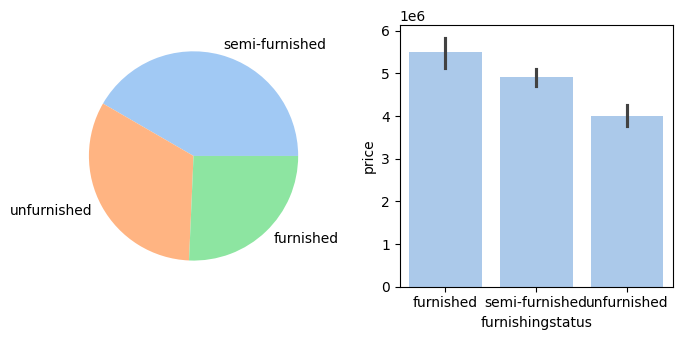

In [31]:
fig, axes = plt.subplots(1, 2)

# 先获得该列中的计数和标签
furnishingstatus_count = data["furnishingstatus"].value_counts()
furnishingstatus_label = furnishingstatus_count.index

# 将饼图和柱状图加入子图中
axes[0].pie(furnishingstatus_count, labels = furnishingstatus_label)
sns.barplot(data, x = "furnishingstatus", y = "price", ax = axes[1])

plt.show()

# 4. 回归分析

由于卧室数量在确定的范围内，可以理解为分类型变量，使用柱状图描述

## 4.1 设置虚拟变量

观察原数据，可以发现`mainroad` `guestroom` `basement` `hotwaterheating` `airconditioning` `prefarea` `frunishingstatus`都可以使用虚拟变量表示

In [32]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [33]:
dummies_list = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning",
               "prefarea", "furnishingstatus"]
reg_data = pd.get_dummies(data, columns = dummies_list, dtype = int, drop_first = True)

In [34]:
reg_data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


## 4.2 因变量与自变量

In [35]:
y = reg_data["price"]
X = reg_data.drop("price", axis = 1)

In [36]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0,0


## 4.3 相关性检验

In [37]:
X.corr()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
area,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194
airconditioning_yes,0.222393,0.160603,0.186915,0.293602,0.159173,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,-0.053179,-0.094086


In [38]:
import matplotlib
matplotlib.rc("font", family = 'Heiti TC')

更直观的观测：**绘制热力图**

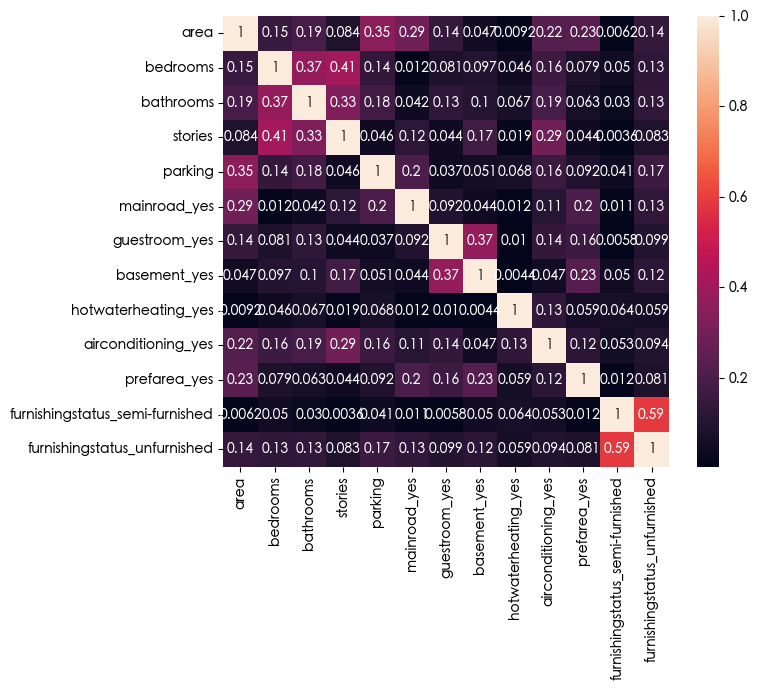

In [39]:
plt.rcParams["figure.figsize"] = [8, 7]
sns.heatmap(X.corr().abs(), annot = True)
plt.show()

一般认为相关系数超过**0.8**时会影响到计算结果，这里的相关系数均小于0.8，因此无需进行修改

## 4.4 添加常数列

In [40]:
X = sm.add_constant(X)

In [41]:
X

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.0,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1.0,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1.0,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1.0,2910,3,1,1,0,0,0,0,0,0,0,0,0


## 4.5 构建回归模型

In [42]:
model = sm.OLS(y, X)
result = model.fit()

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          9.07e-123
Time:                        23:01:55   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
mainroad_yes                     4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom_yes                    3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement_yes                     3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating_yes              8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning_yes               8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
prefarea_yes                     6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

从回归结果中可以看出，拟合优度$R^2$为0.682，说明拟合结果一般；此外，在90%的置信水平下，`const` `bedrooms` `furnishingstatus_semi-furnished`的显著性较差，可以考虑删去。

In [44]:
new_X = X.drop(["const", "bedrooms", "furnishingstatus_semi-furnished"], axis = 1)
new_X

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,7420,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,3,1,0,0,0,1,0,0
2,9960,2,2,2,1,0,1,0,0,1,0
3,7500,2,2,3,1,0,1,0,1,1,0
4,7420,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,1,1,2,1,0,1,0,0,0,1
541,2400,1,1,0,0,0,0,0,0,0,0
542,3620,1,1,0,1,0,0,0,0,0,1
543,2910,1,1,0,0,0,0,0,0,0,0


In [45]:
model = sm.OLS(y, new_X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Fri, 18 Jul 2025   Prob (F-statistic):                        0.00
Time:                        23:01:55   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
mainroad_yes                  4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom_yes                 2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement_yes                  4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating_yes           8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning_yes           8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
prefarea_yes                  6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5. 预测

## 5.1 导入新数据

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

In [46]:
X.head()

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1.0,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1.0,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1.0,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1.0,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [47]:
X.shape

(545, 14)

In [53]:
new_data = [
    [1.0, 5600, 4, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0]
]

In [54]:
# 创建DataFrame
columns_name = X.columns
name_list = list(columns_name)
name_list

['const',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'mainroad_yes',
 'guestroom_yes',
 'basement_yes',
 'hotwaterheating_yes',
 'airconditioning_yes',
 'prefarea_yes',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [55]:
new_observation = pd.DataFrame(new_data, columns=columns_name)
new_observation

,const,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.0,5600,4,2,2,2,0,0,1,1,0,1,1,0


In [56]:
new_observation = new_observation.drop(["const", "bedrooms", "furnishingstatus_semi-furnished"], axis = 1)
new_observation

,area,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,5600,2,2,2,0,0,1,1,0,1,0


预测结果

In [57]:
predicted_price = result.predict(new_observation)
print(predicted_price)

0    7.071927e+06
dtype: float64
